In [31]:
import csv
import pandas as pd
import os
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from matplotlib import pyplot as plt

In [14]:
os.getcwd()
os.chdir("/Users/dnchawla/Downloads")

In [15]:
with open('Madden 23 Player Ratings.csv', 'r') as f:
    csv_reader = csv.reader(f)
    data = []
    for row in csv_reader:
        data.append(row)


df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,﻿Full Name,Team,Position,college,awareness_rating,throwPower_rating,kickReturn_rating,leadBlock_rating,strength_rating,bCVision_rating,...,archetype,blockShedding_rating,runBlockFinesse_rating,teamId,agility_rating,fullNameForSearch,overall_rating,passBlockFinesse_rating,age,primaryKey
0,Aaron Donald,Rams,RE,Pittsburgh,99,20,10,23,99,49,...,DE_PowerRusher,97,45,24,86,Aaron Donald,99,45,31,10852
1,Davante Adams,Raiders,WR,Fresno State,99,45,45,25,63,94,...,WR_DeepThreat,52,12,23,95,Davante Adams,99,17,29,10823
2,Myles Garrett,Browns,RE,Texas AM,98,55,10,17,96,39,...,DE_PowerRusher,90,45,5,85,Myles Garrett,99,45,26,12520
3,Trent Williams,49ers,LT,Oklahoma,99,12,10,98,98,10,...,OT_Power,32,99,15,73,Trent Williams,99,92,34,9800
4,Cooper Kupp,Rams,WR,Eastern Wash.,99,59,84,34,66,96,...,WR_Slot,28,28,24,95,Cooper Kupp,98,34,29,12558


In [16]:
new_df = df.reset_index()

In [17]:
final_df = new_df.drop(['index','runningStyle_rating', 'Position','Team', 'college', 'firstName','height','plyrAssetname','plyrPortrait','plyrHandedness','status','jerseyNum','plyrBirthdate','weight','iteration','archetype', 'yearsPro', 'totalSalary', 'position', 'lastName', 'team', 'signingBonus', 'teamId', 'fullNameForSearch', 'age', 'primaryKey'], axis =1)

In [18]:
final_df = new_df.drop(['index','runningStyle_rating', 'Position','Team', 'college', 'firstName','height','plyrAssetname','plyrPortrait','plyrHandedness','status','jerseyNum','plyrBirthdate','weight','iteration','archetype', 'yearsPro', 'totalSalary', 'position', 'lastName', 'team', 'signingBonus', 'teamId', 'fullNameForSearch', 'age', 'primaryKey'], axis =1)
without_pos = final_df
without_pos1 = without_pos.set_index('﻿Full Name')
without_pos2 = without_pos1


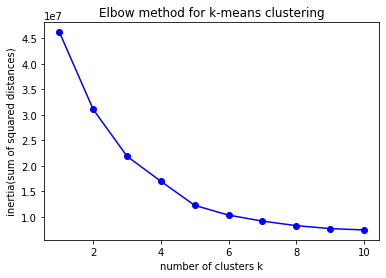

In [19]:

k_values = range(1,11)

inertias = [] 
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(without_pos1)
    inertias.append(kmeans.inertia_)


plt.plot(k_values, inertias, 'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('inertia(sum of squared distances)')
plt.title('Elbow method for k-means clustering')
plt.show()
    

In [21]:
sim_matrix_data=without_pos.copy()
#sim_matrix_data = sim_matrix_data.drop(['cluster', 'cluster_new'],axis=1)
sim_matrix_data1 = sim_matrix_data.reset_index()
sim_matrix_data1.head()
features = sim_matrix_data1.drop('﻿Full Name', axis =1)


In [22]:
similarity_matrix = euclidean_distances(features)
similarity_df = pd.DataFrame(similarity_matrix, columns =sim_matrix_data1['﻿Full Name'] )
similarity_df.head()

﻿Full Name,Aaron Donald,Davante Adams,Myles Garrett,Trent Williams,Cooper Kupp,Jalen Ramsey,Travis Kelce,Zack Martin,Derrick Henry,George Kittle,...,Morgan Cox,Scott Daly,Jon Weeks,Luke Rhodes,Taybor Pepper,Ross Matiscik,Zach Triner,Joe Cardona,Matthew Orzech,Zach Wood
0,0.000000,324.464174,87.028731,246.341227,335.486214,224.915540,316.124975,251.650551,271.315315,288.683217,...,2363.806464,2368.208183,2364.998732,2366.026416,2371.662919,2368.786187,2372.522497,2375.019368,2375.092840,2371.922427
1,324.464174,0.000000,312.216271,361.448475,98.142753,250.507485,164.456681,360.134697,157.692739,143.251527,...,2372.268535,2372.353473,2374.272941,2374.427510,2374.077926,2377.765968,2377.137775,2377.564720,2377.599420,2382.190379
2,87.028731,312.216271,0.000000,263.935598,315.627946,188.140905,292.948801,263.510911,250.906357,279.724865,...,2362.773159,2366.786429,2363.541199,2363.619047,2369.998945,2366.935149,2370.932517,2373.083016,2373.269053,2370.149784
3,246.341227,361.448475,263.935598,0.000000,346.821280,321.780981,306.262959,67.616566,286.034963,273.206881,...,2364.251044,2363.422095,2367.183770,2369.156179,2367.152931,2370.355670,2368.416982,2369.908648,2371.044917,2373.592214
4,335.486214,98.142753,315.627946,346.821280,0.000000,252.158680,130.613935,345.153589,146.256624,134.033578,...,2370.074682,2369.706944,2371.874786,2372.269799,2371.826301,2375.779662,2374.296527,2374.842311,2375.045894,2379.880879


In [23]:
cluster_model = KMeans(n_clusters = 21)
#selected 21 because in data set there are 21 position
cluster_model.fit(without_pos1)

cluster_labels = cluster_model.predict(without_pos1)
player_cluster_df = pd.DataFrame(cluster_labels, index=without_pos1.index, columns=["cluster"])

player_cluster_df["cluster"].value_counts()


for cluster,player in player_cluster_df.groupby("cluster"):
    print("Cluster:", cluster, "Size:", player.shape[0])

    print(player.sample(5))


Cluster: 0 Size: 36
                   cluster
﻿Full Name                
Troy Andersen            0
Kaden Elliss             0
Jabril Cox               0
Kenny Robinson Jr        0
Joshuah Bledsoe          0
Cluster: 1 Size: 58
                  cluster
﻿Full Name               
Ja'Tyre Carter          1
Dylan Parham            1
Matt Feiler             1
Tyron Smith             1
Beau Benzschawel        1
Cluster: 2 Size: 175
                 cluster
﻿Full Name              
Braxton Berrios        2
Tre Nixon              2
Kawaan Baker           2
Brandon Smith          2
Marcus Johnson         2
Cluster: 3 Size: 76
                   cluster
﻿Full Name                
Austin Seibert           3
Brandon McManus          3
Rigoberto Sanchez        3
Jonathan Garibay         3
Jordan Berry             3
Cluster: 4 Size: 83
                 cluster
﻿Full Name              
Jakob Johnson          4
Tae Crowder            4
Troy Dye               4
D'Marco Jackson        4
Aaron Patrick 

In [26]:

cluster_model1 = AgglomerativeClustering(n_clusters=5)
cluster_model1.fit(without_pos2)

cluster_labels1 = cluster_model1.labels_
player_cluster_df1 = pd.DataFrame(cluster_labels1, index=without_pos2.index, columns=["cluster1"])

player_cluster_df1["cluster1"].value_counts()

for cluster1,player1 in player_cluster_df1.groupby("cluster1"):
    print("Cluster:", cluster1, "Size:", player1.shape[0])
    print(player.sample(5))

Cluster: 0 Size: 178
                   cluster
﻿Full Name                
Cornell Powell          20
Van Jefferson           20
Ja'Marcus Bradley       20
David Moore             20
Cedrick Wilson          20
Cluster: 1 Size: 612
                     cluster
﻿Full Name                  
Treylon Burks             20
Ja'Marr Chase             20
Jason Moore Jr            20
Lil'Jordan Humphrey       20
Cedrick Wilson            20
Cluster: 2 Size: 394
                    cluster
﻿Full Name                 
Diontae Johnson          20
Treylon Burks            20
Shi Smith                20
Michael Pittman Jr       20
Terry McLaurin           20
Cluster: 3 Size: 673
                  cluster
﻿Full Name               
Josh Gordon            20
Brandon Aiyuk          20
Robert Woods           20
Sterling Shepard       20
Tom Kennedy            20
Cluster: 4 Size: 511
                     cluster
﻿Full Name                  
Deebo Samuel              20
Laviska Shenault Jr       20
Denzel Mi

In [27]:
def create_clusters(df, rating1, rating2):
    cluster_model_new = KMeans(n_clusters=5, random_state=42)
    cluster_model_new.fit(df[[rating1, rating2]])
    labels = cluster_model_new.labels_
    df['cluster_new'] = labels

    clusters = []
    for i in range(5):
        clusters.append(df[df['cluster_new'] == i])

    colors = ['red', 'blue', 'green', 'purple', 'orange']
    for i in range(5):
        plt.scatter(clusters[i][rating1], clusters[i][rating2], c=colors[i], label=f'Cluster_{i+1}')

    plt.xlabel(rating1)
    plt.ylabel(rating2)
    plt.title('Cluster Visualization')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

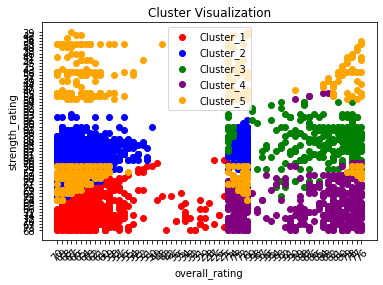

In [28]:
create_clusters(without_pos, 'overall_rating', 'strength_rating')

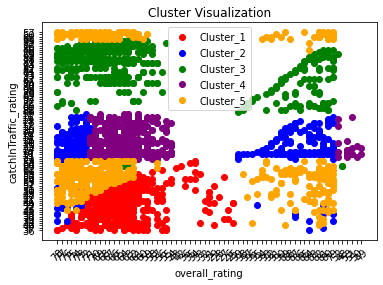

In [29]:
create_clusters(without_pos, 'overall_rating', 'catchInTraffic_rating')

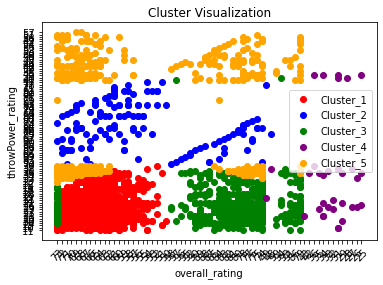

In [30]:
create_clusters(without_pos, 'overall_rating', 'throwPower_rating')